<a href="https://colab.research.google.com/github/Venni2911/LogicMojo-AI-ML-Sept25-VenniRaj/blob/main/Lead_Score_Assignment_Answer%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lead Scoring Case Study Assignment


### Problem Statement:

X Education is an online eduction provider to industry professional. They market their products through various digital media and capture the leads(people who click ads/ watch videos/ enter contact info) and have sales team try and convert those leads to actual customers. The conversion rate though is not very great and hence, X education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. They want to solve this problem using data and analytics.


#### Approach taken:

To approach this problem we are given a dataset with >9000 data points and we need to utilize them to work on a target variable 'Converted' so that we increase the overall lead conversion ratio. We need to identify the potential 'Hot Leads' so that sales can specifically focus on those leads and try and convert almost all of them. We chose to do the following steps to go forward with this case study:

1. Read and understand the data
2. Clean the data - Data Preparation ( This includes handling nulls and treating outliers and making the dataset to a most useful form so that we can drive best results)
3. Performing univariate and bivariate analysis to get a glimpse and summary deductions from the dataset
4. Creating Dummies for categorical Variables - Data Preparation
5. Performing train-test split and scaling - Data Preparation
6. Modelling - RFE, GLM, optimal cutoffs
7. Check the validity of the model by using cunfusion matrix and metrics such as Accuracy, Sensitivity, Speficity, Recall and Precision
8. Test the data on the test set to check how the model is performing
9. Drive insights on the outcome and suggest recommendations based on optimal threshold

### Reading and Understanding the dataset

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:

#Importing libraries used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#Reading the dataset in a dataframe
df = pd.read_csv('Leads.csv')

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
df.shape

(9240, 37)

### Data Cleaning

#### Based on the info and shape we see a lot of columns have nulls and therefore, we need to do proper treatment before we procees forward with our analysis

#### Finding the >30% null values columns and checking with business knowledge if we can remove them completely from our analysis

In [ ]:
null_per =df.isnull().sum()/len(df)*100
too_much_nulls = null_per[null_per.values > 30]
too_much_nulls

Tags                           36.287879
Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [ ]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [ ]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [ ]:
df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

#### So the columns stores in too_much_nulls seem to be Sales team generated and hence have a lot of nulls. These columns are based on personal intuition and might be skewed and also as these have a lot of nulls we should remove them so that they don't impact our analysis adversely

In [ ]:
l = list(too_much_nulls.index)
#df.drop(labels= l, axis = 1, inplace = True)
l

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [ ]:
df.drop(labels= l, axis = 1, inplace = True)
df.shape

(9240, 31)

#### Now we see the columns are dropped and lets now proceed forward with fixing other nulls and try and impute them with valid values

In [ ]:
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [ ]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [ ]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### We see that Lead Profile and What matters most to you in choosing a course are varaiables with almost 30% of their values nulls, moreover, lead profile is sales team generated column and 'What matters most to you in choosing a course' is mostly skewed to Better Career Prospects as we see from value_counts(), hence it won't impact our classification much. We are removing these 2 as well.

In [ ]:
df.drop(labels= ['Lead Profile','What matters most to you in choosing a course'], axis = 1, inplace = True)
df.shape

(9240, 29)

In [ ]:
null_col = df.isnull().sum()/len(df)*100
null_col [ null_col.values > 0 ]

Lead Source                            0.389610
TotalVisits                            1.482684
Page Views Per Visit                   1.482684
Last Activity                          1.114719
Country                               26.634199
Specialization                        15.562771
How did you hear about X Education    23.885281
What is your current occupation       29.112554
City                                  15.367965
dtype: float64

In [ ]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### We see a new value SELECT in this field which is again equivalent to null and hence since it has 23% of nulls already and then highest number of SELECT values we are removing this column as well, since not much data to draw insights from

In [ ]:
df.drop('How did you hear about X Education', axis = 1, inplace = True)
df.shape

(9240, 28)

#### Lets try and see what distinct values each of these variables with null values have and then we can try and treat them by either dropping them or imputing them with suitable values

In [ ]:
# Checking column Country

df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
Netherlands                2
Belgium                    2
Asia/Pacific Region        2
Uganda                     2
Ghana                      2
China                      2
Philippines                2
Italy                      2
Bangladesh                 2
Vietnam                    1
Malaysia                   1
Russia                     1
Liberia                    1
Denmark                    1
Switzerland                1
Sri Lanka     

#### We see that most values are India and hence we'll fill the nulls with India which tis the mode

In [ ]:
df["Country"]=df["Country"].fillna("India")
null_col = df.isnull().sum()/len(df)*100
null_col [ null_col.values > 0 ]

Lead Source                         0.389610
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
Specialization                     15.562771
What is your current occupation    29.112554
City                               15.367965
dtype: float64

In [ ]:
df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
Netherlands                2
Belgium                    2
Asia/Pacific Region        2
Uganda                     2
Ghana                      2
China                      2
Philippines                2
Italy                      2
Bangladesh                 2
Vietnam                    1
Malaysia                   1
Russia                     1
Liberia                    1
Denmark                    1
Switzerland                1
Sri Lanka     

#### We see that most of the values are India and then apart from that the values are split between multiple countries, hence we will combine all of these values to a single Other value which will help us when we create dummy variable out of this

In [ ]:
df.loc[df['Country']!='India','Country']='Other'
df['Country'].value_counts()

India    8953
Other     287
Name: Country, dtype: int64

In [ ]:
#Shifting our focus on City now and checking what's happening with this
df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
df["City"]=df["City"].fillna("np.nan")
df.loc[df['City']=='Select','City']='np.nan'
df["City"].value_counts()/len(df['City'].index)*100

np.nan                         39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

#### We see there is a unique value of SELECT here and when we impute the nulls and selects with np.nan we find that there are around 40% of null values, so the best thing would be to drop this variable.

#### Second argument to drop this variable is that apart from this 40%, most values are Mumbai, we could have imputed these 40 % by Mumbai but then the resultant categorical variable would not tell us a great picture and might be skewed towards Mumbai whereas there 40% records which we know nothing about

In [ ]:
df.drop('City', axis = 1, inplace = True)
df.shape

(9240, 27)

In [ ]:
#Lets look at Specialization know for unique values
df["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
df["Specialization"]=df["Specialization"].fillna("np.nan")
df.loc[df['Specialization']=='Select','Specialization']='np.nan'
df["Specialization"].value_counts()/len(df['Specialization'].index)

np.nan                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

#### This column again resulted in 36% nulls which is too much to impute or drop rows. Hence we will drop the complete column

In [ ]:
df.drop('Specialization', axis = 1, inplace = True)
df.shape

(9240, 26)

In [ ]:
null_col = df.isnull().sum()/len(df)*100
null_col [ null_col.values > 0 ]

Lead Source                         0.389610
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
What is your current occupation    29.112554
dtype: float64

In [ ]:
#Lets look at What is your current occupation
df["What is your current occupation"]=df["What is your current occupation"].fillna("np.nan")
df['What is your current occupation'].value_counts()/len(df['What is your current occupation'].index)*100

Unemployed              60.606061
np.nan                  29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

#### We see 60% of the people who are potential leads are Unemployed and there are about 30 % nulls, with other categories being too less, so we can impute the nulls with Unemployed

In [ ]:
df.loc[df['What is your current occupation']=='np.nan','What is your current occupation']='Unemployed'

In [ ]:
df['What is your current occupation'].value_counts()/len(df['What is your current occupation'].index)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [ ]:
#Lets move on to Lead Source
df['Lead Source']=df['Lead Source'].fillna("np.nan")

lead_perc = df['Lead Source'].value_counts()/len(df['Lead Source'].index)*100
lead_perc

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
np.nan                0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
youtubechannel        0.010823
welearnblog_Home      0.010823
Pay per Click Ads     0.010823
blog                  0.010823
NC_EDM                0.010823
WeLearn               0.010823
testone               0.010823
Name: Lead Source, dtype: float64

#### Now we see that the nulls values are pretty less and also generally in this category the apart from top 5-6 all other values are very less so we would combine them to form another category called Other instead of going in-depth of all the initial values

In [ ]:
# Creating a list of all values with <10% of the total values, we'll combine them to form Other
l = lead_perc[lead_perc.values<10].index
list(l)

['Reference',
 'Welingak Website',
 'Referral Sites',
 'Facebook',
 'np.nan',
 'bing',
 'google',
 'Click2call',
 'Social Media',
 'Live Chat',
 'Press_Release',
 'youtubechannel',
 'welearnblog_Home',
 'Pay per Click Ads',
 'blog',
 'NC_EDM',
 'WeLearn',
 'testone']

In [ ]:
for i in list(l):
    df.loc[df['Lead Source']==i,'Lead Source']='Other'

df['Lead Source'].value_counts()/len(df['Lead Source'].index)*100

Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Other              9.956710
Name: Lead Source, dtype: float64

In [ ]:
#Checking back how many more null values are left

null_col = df.isnull().sum()/len(df)*100
null_col [ null_col.values > 0 ]

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64

In [ ]:
#Checking variable Last Activity

df['Last Activity']=df['Last Activity'].fillna("np.nan")

lead_perc = df['Last Activity'].value_counts()/len(df['Last Activity'].index)*100
lead_perc

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
np.nan                           1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [ ]:
#Imputing the null values with Email Opened which is the mode of the values of this column
df.loc[df['Last Activity']== np.nan,'Last Activity']='Email Opened'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

#### As we realize that the variables TotalVisits and Page Views Per Visit are numerical variables and have pretty less null values we will impute those nulls with medians of teh respective columns

In [ ]:
#df['Page Views Per Visit'].head()

values=df['Page Views Per Visit'].median()

df.loc[df['Page Views Per Visit'].isnull(),'Page Views Per Visit']=values

In [ ]:

values=df['TotalVisits'].median()

df.loc[df['TotalVisits'].isnull(),'TotalVisits']=values

#### Checking back again if any of the columns is left for any null values treatment

In [ ]:
#Checking again how many columns have null values after null value treatment
null_col = df.isnull().sum()/len(df)*100
null_col [ null_col.values > 0 ]

Series([], dtype: float64)

### Data validation and Preparation

In [ ]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [ ]:
df_num = ['TotalVisits',
          'Total Time Spent on Website',
          'Page Views Per Visit'
          ]

df_cat = ['Lead Origin',
          'Lead Source',
          'Do Not Email',
          'Do Not Call',
          'Last Activity',
          'Country',
          'What is your current occupation',
          'Search',
          'Magazine',
          'Newspaper Article',
          'X Education Forums',
          'Newspaper',
          'Digital Advertisement',
          'Through Recommendations',
          'Receive More Updates About Our Courses',
          'Update me on Supply Chain Content',
          'Get updates on DM Content',
          'I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview',
          'Last Notable Activity'
         ]

In [ ]:
df[df_cat].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


### Now lets quicly validate the dataset if it has duplicates and also check what kinds of values are present in the variables

In [ ]:
##creating dataframe for duplicate values if any
dup_chck=df[df.duplicated(["Prospect ID"])]
dup_chck

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [ ]:
sum(df.duplicated('Prospect ID')) == 0

True

In [ ]:
sum(df.duplicated('Lead Number')) == 0

True

In [ ]:
df.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                    5
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 18
Country                                        2
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

**Thus from here we can see those variables which have only one unique value:**
- Magazine
- Get updates on DM Content
- I agree to pay the amount through cheque
- Receive More Updates About Our Courses
- Update me on Supply Chain Content



    

In [ ]:
#Checking what sort of values are present

df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [ ]:
# Checking what sort of values are present

df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

#### Since all of the below values are No and they are unique in terms of no variance in values, we know that these do not impact whether the lead has been converted or not. Hence, for our analysis we'll go ahead and delete these

In [ ]:
l = df.nunique()
z = l[l.values == 1]
single_var = list(z.index)
single_var

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [ ]:
df.drop(labels = single_var, axis  = 1, inplace = True)
df.shape

(9240, 21)

In [ ]:
df_cat = ['Lead Origin',
          'Lead Source',
          'Do Not Email',
          'Do Not Call',
          'Last Activity',
          'Country',
          'What is your current occupation',
          'Search',
          'Newspaper Article',
          'X Education Forums',
          'Newspaper',
          'Digital Advertisement',
          'Through Recommendations',
          'A free copy of Mastering The Interview',
          'Last Notable Activity'
         ]

#### Creating a list of all the Yes/No variables as we'll have to eventually shift them to 1/0 flag for our modelling

In [ ]:
l = df.nunique()
z = l[l.values <= 2]
binary_var = list(z.index)
binary_var

['Do Not Email',
 'Do Not Call',
 'Converted',
 'Country',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

#### Now for modelling needs we would require these metrics to be onverted to 1/0 flags instead of Yes/No flags, but we can do that later as well post Univariate and Bivariate Analysis

#### Before moving ahead lets check all non- binary categorical variables if they have SELECT as one of the values, in those cases we'll have to impute those

In [ ]:
l = df[df_cat].nunique()
z = l[l.values > 2]
non_binary_var = list(z.index)
non_binary_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'Last Notable Activity']

In [ ]:

#Checking if any of the non binary variables have Select as one of the values
list_var = []
for i in non_binary_var:
    if df[df[i]=='Select'].shape[0]!=0:
        list_var.append(i)
list_var

#df[df['Lead Origin']=='Select'].shape

[]

#### hence, we find we now have a clean dataset on which we can perform our EDA and then modelling

In [ ]:
# Lets check the conversion rate
Conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
Conversion_rate

38.53896103896104

# Univariate & Bi-Variate Analysis of Numerical and Categorical Variables

## Categorical Variables

#### Univariate Analysis: Lets start with univariate analysis for categorical variables and see whether which of the variables impact more towards lead conversion

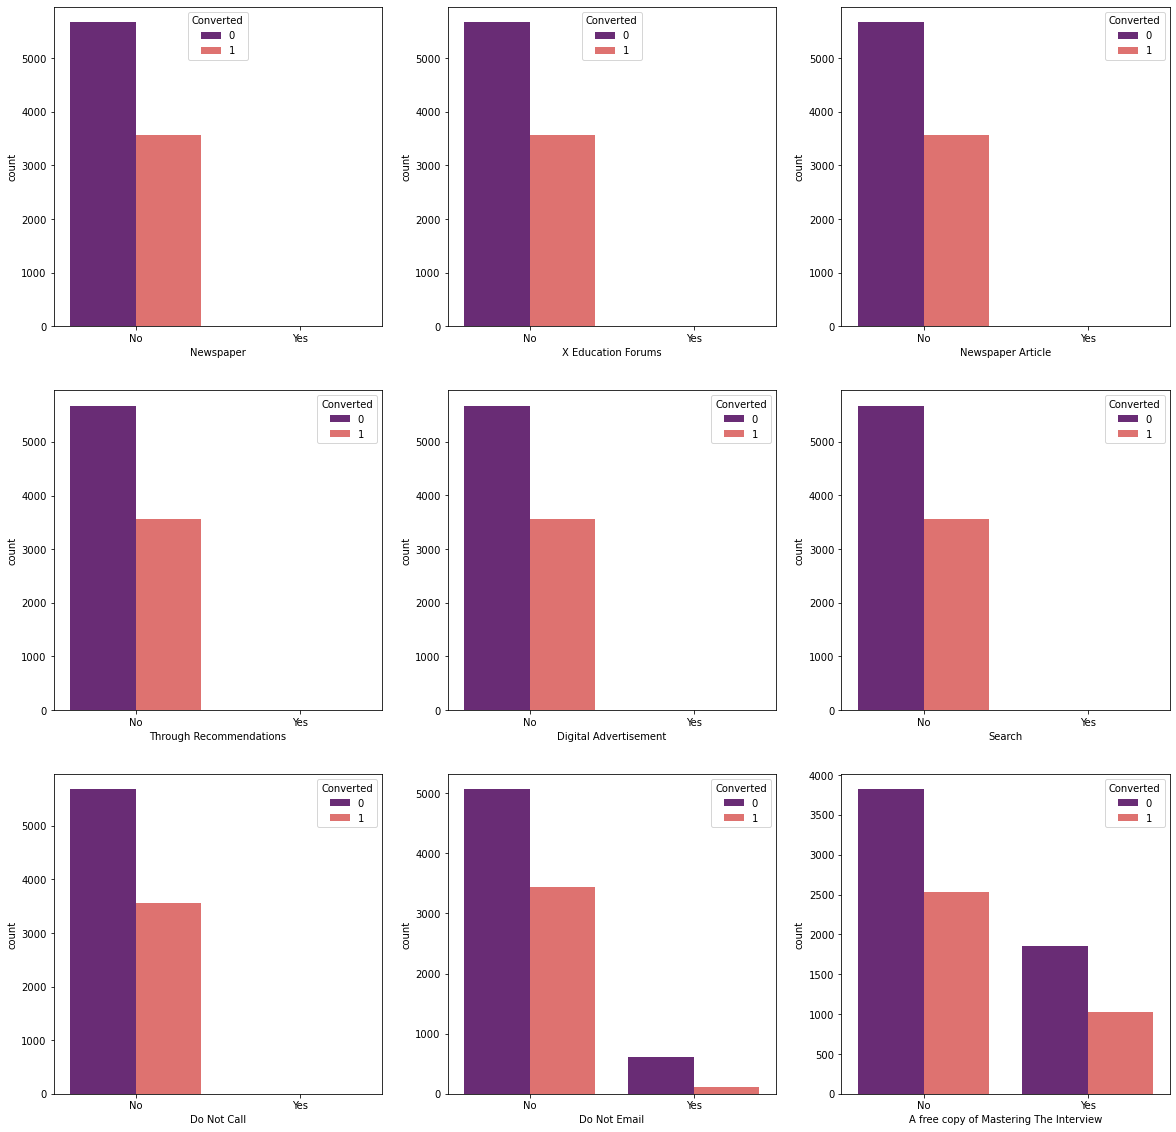

In [ ]:
#Analysing Categorical variables

plt.figure(figsize=(20,20))
plt.subplot(331)
sns.countplot(data = df, x=  'Newspaper', order=df['Newspaper'].value_counts().index,hue = df['Converted'],palette='magma')

plt.subplot(332)
sns.countplot(data = df, x= 'X Education Forums', order=df['X Education Forums'].value_counts().index,hue = df['Converted'],palette='magma')

plt.subplot(333)
sns.countplot(data = df, x=  'Newspaper Article', order=df['Newspaper Article'].value_counts().index,hue = df['Converted'],palette='magma')

plt.subplot(334)
sns.countplot(data = df, x=  'Through Recommendations', order=df['Through Recommendations'].value_counts().index,hue = df['Converted'],palette='magma')

plt.subplot(335)
sns.countplot(data = df, x=  'Digital Advertisement' , order=df[ 'Digital Advertisement' ].value_counts().index,hue = df['Converted'],palette='magma')

plt.subplot(336)
sns.countplot(data = df, x= 'Search', order=df['Search'].value_counts().index,hue = df['Converted'],palette='magma')

plt.subplot(337)
sns.countplot(data = df, x=  'Do Not Call', order=df['Do Not Call'].value_counts().index,hue = df['Converted'],palette='magma')

plt.subplot(338)
sns.countplot(data = df, x=  'Do Not Email', order=df['Do Not Email'].value_counts().index,hue = df['Converted'],palette='magma')

plt.subplot(339)
sns.countplot(data = df, x=  'A free copy of Mastering The Interview', order=df['A free copy of Mastering The Interview'].value_counts().index,hue = df['Converted'],palette='magma')


plt.show()

**Newspaper ,**
**X Education Forums ,**
**Newspaper Articles ,**
**Through Recommendations ,**
**Digital Advertisements :**
- for all these variables above mentioned , all the values are no hence it does not have any significant role in lead score, drop this column

**Search :**
- 99% values are no except a few yes and missing, hence it does not have any significant role in lead score, drop this column

**Do Not Call :**
- All the values are no except 2 values, hence there is no variance, doesnt indicate anything about leads and can easily be dropped

In [ ]:
df=df.drop(["Newspaper","X Education Forums","Newspaper Article",
                          "Through Recommendations","Digital Advertisement",
                          "Search","Do Not Call"],axis=1)

In [ ]:
#Changing the
df_cat = ['Lead Origin',
          'Lead Source',
          'Do Not Email',
          'Last Activity',
          'Country',
          'What is your current occupation',
          'A free copy of Mastering The Interview',
          'Last Notable Activity'
         ]

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,No,Modified


In [ ]:
df.shape

(9240, 14)

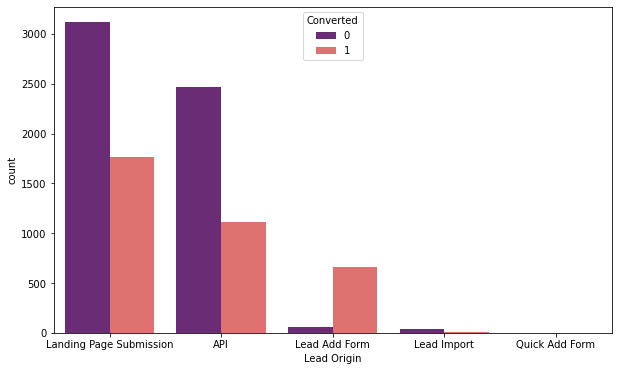

In [ ]:
# plotting Lead Origin count plot
plt.figure(figsize = (10,6))
sns.countplot(data = df, x= 'Lead Origin', order=df['Lead Origin'].value_counts().index,hue = df['Converted'],palette='magma')
plt.show()

#### We see that the landing page Submission Lead origin have highest Converted

<AxesSubplot:xlabel='Lead Source', ylabel='count'>

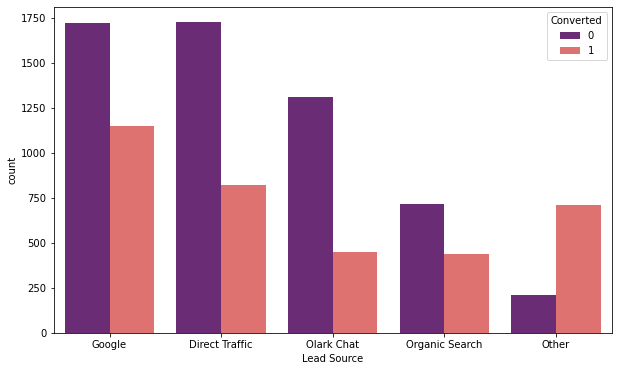

In [ ]:
#Plotting Lead source count plot
plt.figure(figsize = (10,6))

sns.countplot(data = df, x=  'Lead Source', order=df['Lead Source'].value_counts().index,hue = df['Converted'],palette='magma')


<AxesSubplot:xlabel='Last Activity', ylabel='count'>

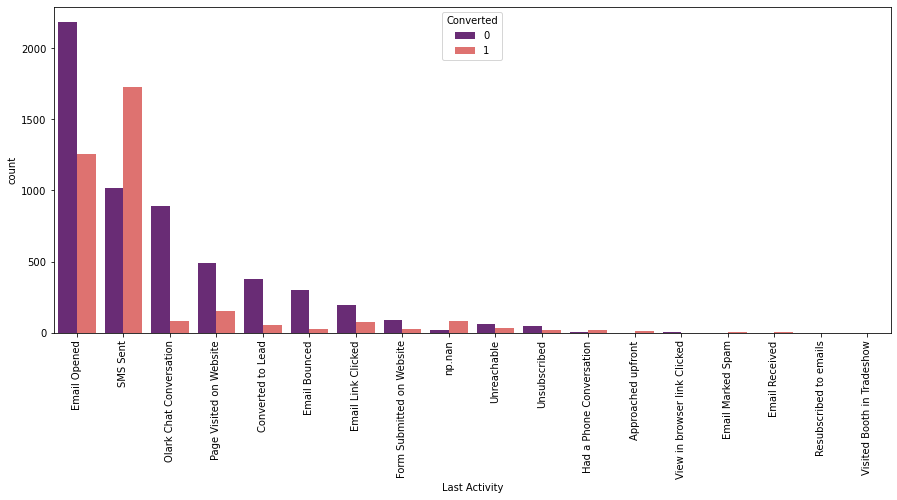

In [ ]:
#Plotting Last Activity with counts
plt.figure(figsize = (15,6))
plt.xticks(rotation=90)
sns.countplot(data = df, x=  'Last Activity', order=df['Last Activity'].value_counts().index,hue = df['Converted'],palette='magma')


#### We see that the SMS Sent Activity people have relatively very high conversion rate than others and they even convert more often than not, so Sales team can predominantly work on converting more of these as this is the strength.

## Numeric Variables

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df[df_num].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


#### The general trend increases as the percentiles increase, so this does not give a lot fo ideas about outliers

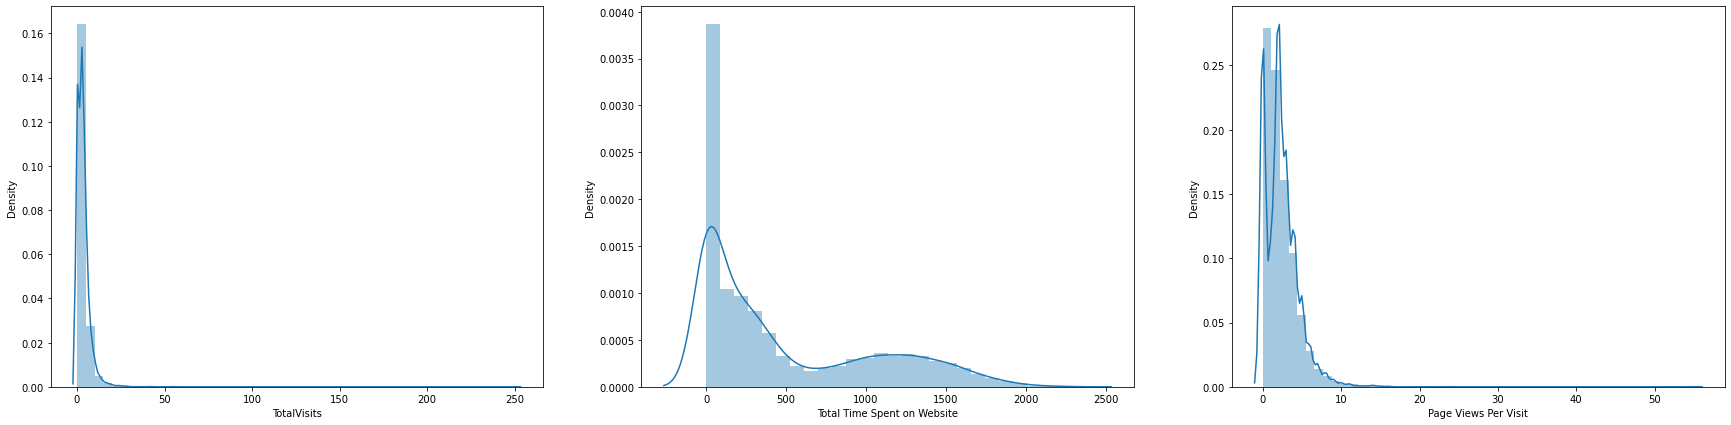

In [ ]:
# Getting Genral Idea About Numeric Variables

plt.figure(figsize =(30,7))
plt.subplot(1,3,1)
sns.distplot(df['TotalVisits'])


plt.subplot(1,3,2)
sns.distplot(df['Total Time Spent on Website'])


plt.subplot(1,3,3)
sns.distplot(df['Page Views Per Visit'])
plt.show()

#### The numeric fields seem to be following the normal curve

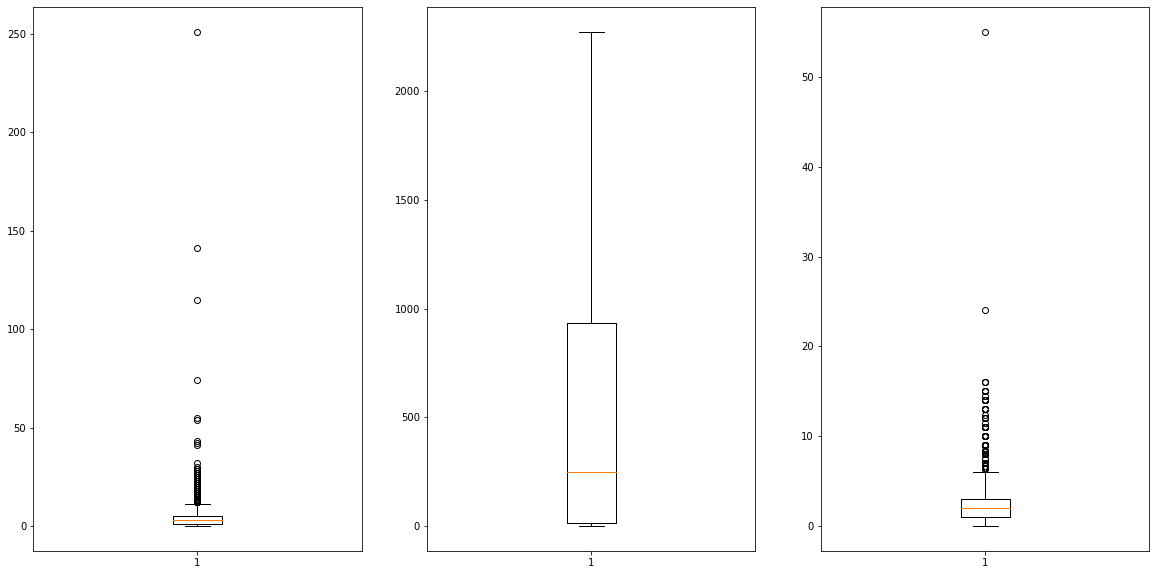

In [ ]:
#Checking for outliers

plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
plt.boxplot(df['TotalVisits'])


plt.subplot(1,3,2)
plt.boxplot(df['Total Time Spent on Website'])


plt.subplot(1,3,3)
plt.boxplot(df['Page Views Per Visit'])
plt.show()

#### We see Total Visits and Pages View per Visit have a few outliers but we are not very sure if we want treat the, as there can be cases where people are spending more time than most and then finally converting the leads to actual customers, so we'll leave it for business to decide

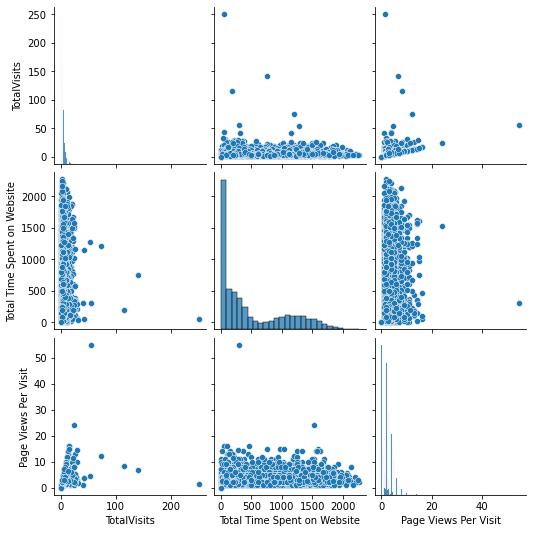

In [ ]:
# General trend on collinearity between numical variables

sns.pairplot(df[df_num])

#### Pair plots do not actually give a heavy collinearity between the 3 numerical variables

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,No,Modified


#### Mapping the Yes/No variables to 1/0

In [ ]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,0,Modified


#### Changing the categorical variables list as and when we make changes to the data set. Post this we will make dummy variables which wil help in modelling

In [ ]:
df_cat = ['Lead Origin',
         'Lead Source',
         'Last Activity',
         'Country',
         'What is your current occupation',
         'Last Notable Activity']

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[df_cat], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df.drop(labels= df_cat, axis = 1, inplace = True)
df.shape

(9240, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Lead Number                                           9240 non-null   int64  
 2   Do Not Email                                          9240 non-null   int64  
 3   Converted                                             9240 non-null   int64  
 4   TotalVisits                                           9240 non-null   float64
 5   Total Time Spent on Website                           9240 non-null   int64  
 6   Page Views Per Visit                                  9240 non-null   float64
 7   A free copy of Mastering The Interview                9240 non-null   int64  
 8   Lead Origin_Landing Page Submission                   9240

#### Now we see everything is converted into a float/ numeric data type and is in the form we want to model our data to drive insights.

In [ ]:
df_num

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [ ]:
df_num = df.iloc[:,2:]
df_num.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### We now see correlation among all the numerical variables and remove some of the highly correlated ones to reduce the features from 54 to somewhat lesser, this will help us to avoid our model being over-fitted to the data

<AxesSubplot:>

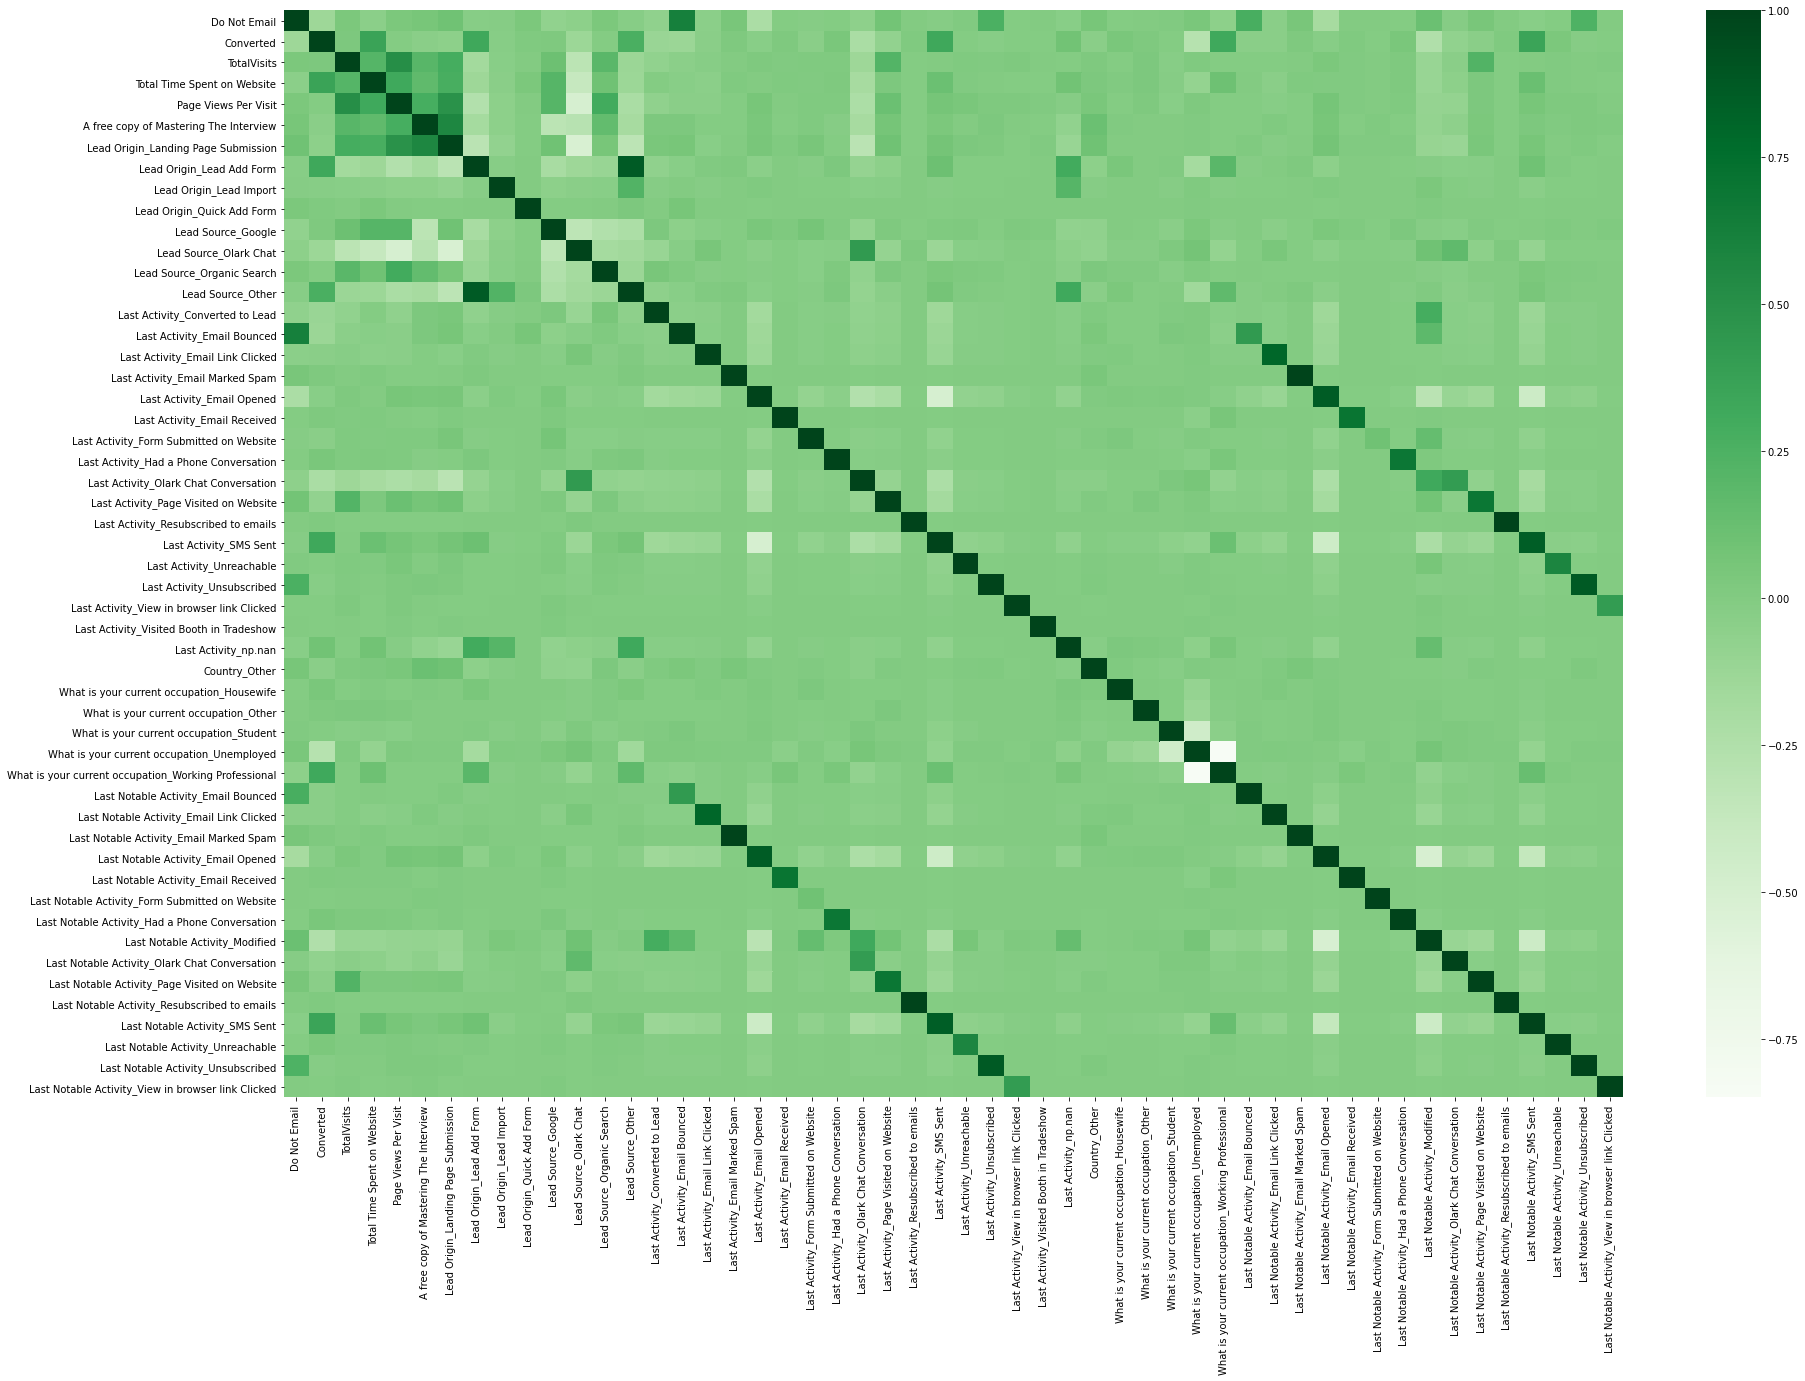

In [ ]:
correlation = df_num.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation, annot = False, cmap = 'Greens')

In [ ]:
correlation

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.135580,0.033640,-0.046374,0.033404,0.055762,0.095304,-0.020983,-0.017529,0.035416,...,-0.003056,-0.011443,0.117259,-0.013032,0.049921,-0.003056,-0.025990,-0.010505,0.243408,-0.003056
Converted,-0.135580,1.000000,0.029119,0.362483,-0.005068,-0.039820,-0.051236,0.321702,-0.023695,0.013138,...,-0.008238,0.043476,-0.244294,-0.072660,-0.036051,0.013138,0.351845,0.036594,-0.012858,-0.008238
TotalVisits,0.033640,0.029119,1.000000,0.217341,0.512214,0.202491,0.290871,-0.164679,-0.031862,-0.000947,...,-0.003106,0.022438,-0.106902,-0.037440,0.227865,-0.007424,-0.003163,0.005721,0.001068,0.009848
Total Time Spent on Website,-0.046374,0.362483,0.217341,1.000000,0.314266,0.168298,0.276009,-0.139681,-0.034926,0.032831,...,-0.003810,0.022261,-0.106857,-0.051402,0.026644,-0.009259,0.125076,0.008941,0.000503,-0.007569
Page Views Per Visit,0.033404,-0.005068,0.512214,0.314266,1.000000,0.277946,0.484385,-0.260746,-0.048300,-0.001733,...,-0.001733,0.014130,-0.096433,-0.087553,0.027158,-0.011431,0.056851,0.019723,0.018222,0.001516
A free copy of Mastering The Interview,0.055762,-0.039820,0.202491,0.168298,0.277946,1.000000,0.569633,-0.180893,-0.052178,-0.007015,...,0.015429,-0.008258,-0.084626,-0.057305,0.037921,-0.007015,0.028704,0.003967,0.020709,0.015429
Lead Origin_Landing Page Submission,0.095304,-0.051236,0.290871,0.276009,0.484385,0.569633,1.000000,-0.307485,-0.081974,-0.011021,...,0.009821,0.003328,-0.101822,-0.114790,0.046200,-0.011021,0.057507,0.000291,0.015686,-0.011021
Lead Origin_Lead Add Form,-0.020983,0.321702,-0.164679,-0.139681,-0.260746,-0.180893,-0.307485,1.000000,-0.022461,-0.003020,...,-0.003020,-0.011307,-0.013192,-0.029654,-0.023752,-0.003020,0.092690,0.003533,-0.009389,-0.003020
Lead Origin_Lead Import,-0.017529,-0.023695,-0.031862,-0.034926,-0.048300,-0.052178,-0.081974,-0.022461,1.000000,-0.000805,...,-0.000805,-0.003014,0.037095,-0.011000,-0.014609,-0.000805,-0.039579,-0.004562,-0.005533,-0.000805
Lead Origin_Quick Add Form,0.035416,0.013138,-0.000947,0.032831,-0.001733,-0.007015,-0.011021,-0.003020,-0.000805,1.000000,...,-0.000108,-0.000405,0.013613,-0.001479,-0.001964,-0.000108,-0.005767,-0.000613,-0.000744,-0.000108


In [ ]:
#Dropping highly correlated variables

high_corr_var = ['Lead Source_Other', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened',
                'Last Notable Activity_Email Received','Last Notable Activity_Had a Phone Conversation','Last Notable Activity_Page Visited on Website',
                'Last Notable Activity_Resubscribed to emails','Last Notable Activity_SMS Sent','Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed'
                ]

df.drop(labels = high_corr_var, axis = 1, inplace = True)
df.shape

(9240, 43)

In [ ]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df_num = df.iloc[:,2:]
df_num.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


#### Now that we have created dummy variables and created the list of the variables we'll actually use fro modelling, next step will include dividing the data set into train test data set

In [ ]:
# Putting feature variable to X
X = df.drop(['Converted','Lead Number'], axis=1)
X = X.set_index('Prospect ID')
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3256f628-e534-4826-9d63-4a8b88782852,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
# Putting response variable to y
y = df[['Prospect ID','Converted']]
y = y.set_index('Prospect ID')
y.head()

,Converted
Prospect ID,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,0
2a272436-5132-4136-86fa-dcc88c88f482,0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0
3256f628-e534-4826-9d63-4a8b88782852,1


In [ ]:
y.index

Index(['7927b2df-8bba-4d29-b9a2-b6e0beafe620',
       '2a272436-5132-4136-86fa-dcc88c88f482',
       '8cc8c611-a219-4f35-ad23-fdfd2656bd8a',
       '0cc2df48-7cf4-4e39-9de9-19797f9b38cc',
       '3256f628-e534-4826-9d63-4a8b88782852',
       '2058ef08-2858-443e-a01f-a9237db2f5ce',
       '9fae7df4-169d-489b-afe4-0f3d752542ed',
       '20ef72a2-fb3b-45e0-924e-551c5fa59095',
       'cfa0128c-a0da-4656-9d47-0aa4e67bf690',
       'af465dfc-7204-4130-9e05-33231863c4b5',
       ...
       'd11c15b7-8056-45a6-8954-771c0d0495fe',
       '4aeae36b-2b57-494f-bdab-dd58844286b4',
       '2d0109e9-dfb2-4664-83de-c2ea75ec7516',
       '3f715465-2546-47cd-afa8-8b8dc63b8b43',
       'c0b25922-511f-4c56-852e-ced210a45447',
       '19d6451e-fcd6-407c-b83b-48e1af805ea9',
       '82a7005b-7196-4d56-95ce-a79f937a158d',
       'aac550fe-a586-452d-8d3c-f1b62c94e02c',
       '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9',
       '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff'],
      dtype='object', name='Prospect ID', length

In [ ]:
y.values

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

### Train Test Split

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,4.0,487,1.33,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
db308a34-ade6-4f0d-9779-586c5be188c7,0,5.0,106,2.50,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1199b37d-f610-4bb8-bf18-15267dec61fa,0,5.0,1230,5.00,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### Scaling the train set using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.100767,0.005716,-0.470569,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
db308a34-ade6-4f0d-9779-586c5be188c7,0,0.290067,-0.691418,0.070401,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.290067,1.365219,1.226321,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6b2d3b2f-9990-449c-9333-012b578e39c8,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


#### After data preparation, cleaning, null treatment, outlier treatment, univariate, bivariate analysis, creating dummy variables, train test split and scaling numerical variables, we finally reach the modelling stage

### Modelling

#### Since this is a classification problem whether we have build a model to predict whether a lead would convert or not, so we use Logistic regression for this problem

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.3
Date:                Mon, 11 Jan 2021   Deviance:                       5326.7
Time:                        23:32:15   Pearson chi2:                 8.86e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.7362    2.6e+04      0.001      0.999    -5.1e+04     5.1e+04
Do Not Email                                            -1.2036      0.217     -5.555      0.000      -1.628      -0.779
TotalVisits                                              0.1885      0.050      3.740      0.000       0.090       0.287
Total Time Spent on Website                              1.0922      0.040     27.394      0.000       1.014       1.170
Page Views Per Visit                                    -0.1186      0.053     -2.254      0.024      -0.222      -0.015
A free copy of Mastering The Interview                  -0.0199      0.104     -0.192      0.848      -0.223       0.183
Lead Origin_Landing Page Submission                     -0.1760      0.104     -1.698      0.089      -0.379       0.027
Lead Origin_Lead Add Form                                4.0782      0.230     17.714      0.000       3.627       4.529
Lead Origin_Lead Import                                  0.2969      0.533      0.557      0.578      -0.748       1.342
Lead Origin_Quick Add Form                              24.3693   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       0.3201      0.108      2.958      0.003       0.108       0.532
Lead Source_Olark Chat                                   1.1541      0.155      7.447      0.000       0.850       1.458
Lead Source_Organic Search                               0.1513      0.125      1.208      0.227      -0.094       0.397
Last Activity_Converted to Lead                        -24.2321    2.6e+04     -0.001      0.999    -5.1e+04     5.1e+04
Last Activity_Email Bounced                            -24.6536    2.6e+04     -0.001      0.999    -5.1e+04     5.1e+04
Last Activity_Email Link Clicked                       -24.0221    2.6e+04     -0.001      0.999    -5.1e+04     5.1e+04
Last Activity_Email Marked Spam                         -0.1869   8.36e+04  -2.24e-06      1.000   -1.64e+05    1.64e+05
Last Activity_Email Opened                             -23.5650    2.6e+04     -0.001      0.999    -5.1e+04     5.1e+04
Last Activity_Email Received                            -2.5173   6.18e+04  -4.07e-05      1.000   -1.21e+05    1.21e+05
Last Activity_Form Submitted on Website                -23.6360    2.6e+04     -0.001      0.999    -5.1e+04     5.1e+04
Last Activity_Had a Phone Conversation                 -21.3564    2.6e+04     -0.001      0.999    -5.1e+04     5.1e+04
Last Activity_Olark Chat Conversation                  -24.5008    2.6e+04     -0.001      0.999    -5.1e+04     5.1e+04
Last Activity_Page Visited on Website                  -23

#### Here we see there are too many variables with very high p values, hence their contribution is insignificant, we might also have a multi-collinear variables here in the dataset, which we'll have to tackle in a iterative way.

#### for this reason, we will use RFE to get us 20 most important features and then we'll remove them manually based on statistics and business knowledge

In [ ]:
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('A free copy of Mastering The Interview', False, 20),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Marked Spam', False, 7),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Email Received', False, 17),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_Res

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_np.nan', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow', 'Country_Other',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object')

#### Using Statsmodel again on the columns we got ftom RFE

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.6
Date:                Mon, 11 Jan 2021   Deviance:                       5393.2
Time:                        23:32:19   Pearson chi2:                 8.94e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7455      1.089     -0.685      0.493      -2.879       1.388
Do Not Email                                            -1.1319      0.191     -5.917      0.000      -1.507      -0.757
Total Time Spent on Website                              1.0964      0.039     27.833      0.000       1.019       1.174
Lead Origin_Lead Add Form                                4.0726      0.196     20.770      0.000       3.688       4.457
Lead Origin_Quick Add Form                              23.3810   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.1324      0.102     11.111      0.000       0.933       1.332
Last Activity_Converted to Lead                         -0.6368      0.229     -2.777      0.005      -1.086      -0.187
Last Activity_Email Bounced                             -1.1497      0.456     -2.523      0.012      -2.043      -0.256
Last Activity_Had a Phone Conversation                   2.3250      0.674      3.449      0.001       1.004       3.646
Last Activity_Olark Chat Conversation                   -0.8242      0.197     -4.190      0.000      -1.210      -0.439
Last Activity_Resubscribed to emails                    23.6134   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.1839      0.074     15.900      0.000       1.038       1.330
Last Activity_np.nan                                    -0.9506      0.448     -2.120      0.034      -1.829      -0.072
What is your current occupation_Housewife               22.5674   1.36e+04      0.002      0.999   -2.65e+04    2.66e+04
What is your current occupation_Other                   -0.2668      1.342     -0.199      0.842      -2.898       2.364
What is your current occupation_Student                 -0.0966      1.113     -0.087      0.931      -2.278       2.085
What is your current occupation_Unemployed              -0.4635      1.089     -0.426      0.670      -2.597       1.670
What is your current occupation_Working Professional     2.3631      1.104      2.141      0.032       0.200       4.526
Last Notable Activity_Email Bounced                      1.3188      0.621      2.122      0.034       0.101       2.537
Last Notable Activity_Modified                          -0.8010      0.088     -9.078      0.000      -0.974      -0.628
Last Notable Activity_Olark Chat Conversation           -0.5437      0.371     -1.465      0.143      -1.271       0.184
========================================================================================================================
"""

#### Now we see that we have much lesser variables and only few have high p value, which we will adjust by manual iteration and modelling. So we will iteratively drop variables with high p and see if the overall model becomes better. At last we will use VIF to check the multi-collinearity of the variables

In [ ]:
col = col.drop('Lead Origin_Quick Add Form')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_np.nan', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.7
Date:                Mon, 11 Jan 2021   Deviance:                       5395.5
Time:                        23:32:19   Pearson chi2:                 8.92e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7458      1.089     -0.685      0.493      -2.880       1.388
Do Not Email                                            -1.1283      0.191     -5.903      0.000      -1.503      -0.754
Total Time Spent on Website                              1.0985      0.039     27.895      0.000       1.021       1.176
Lead Origin_Lead Add Form                                4.0684      0.196     20.791      0.000       3.685       4.452
Lead Source_Olark Chat                                   1.1340      0.102     11.126      0.000       0.934       1.334
Last Activity_Converted to Lead                         -0.6371      0.229     -2.778      0.005      -1.087      -0.188
Last Activity_Email Bounced                             -1.0392      0.439     -2.366      0.018      -1.900      -0.178
Last Activity_Had a Phone Conversation                   2.3255      0.674      3.450      0.001       1.004       3.647
Last Activity_Olark Chat Conversation                   -0.8237      0.197     -4.187      0.000      -1.209      -0.438
Last Activity_Resubscribed to emails                    23.6142   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.1840      0.074     15.898      0.000       1.038       1.330
Last Activity_np.nan                                    -0.9468      0.448     -2.113      0.035      -1.825      -0.068
What is your current occupation_Housewife               22.5680   1.36e+04      0.002      0.999   -2.65e+04    2.66e+04
What is your current occupation_Other                   -0.2693      1.343     -0.201      0.841      -2.901       2.362
What is your current occupation_Student                 -0.0981      1.113     -0.088      0.930      -2.280       2.084
What is your current occupation_Unemployed              -0.4637      1.089     -0.426      0.670      -2.598       1.670
What is your current occupation_Working Professional     2.3608      1.104      2.139      0.032       0.197       4.524
Last Notable Activity_Email Bounced                      1.2039      0.608      1.978      0.048       0.011       2.396
Last Notable Activity_Modified                          -0.8013      0.088     -9.079      0.000      -0.974      -0.628
Last Notable Activity_Olark Chat Conversation           -0.5448      0.371     -1.467      0.142      -1.273       0.183
========================================================================================================================
"""

In [ ]:
col = col.drop('Last Activity_Resubscribed to emails')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_np.nan', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.1
Date:                Mon, 11 Jan 2021   Deviance:                       5398.1
Time:                        23:32:20   Pearson chi2:                 8.92e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7454      1.089     -0.685      0.494      -2.879       1.388
Do Not Email                                            -1.1285      0.191     -5.904      0.000      -1.503      -0.754
Total Time Spent on Website                              1.0984      0.039     27.892      0.000       1.021       1.176
Lead Origin_Lead Add Form                                4.0683      0.196     20.790      0.000       3.685       4.452
Lead Source_Olark Chat                                   1.1386      0.102     11.180      0.000       0.939       1.338
Last Activity_Converted to Lead                         -0.6369      0.229     -2.778      0.005      -1.086      -0.188
Last Activity_Email Bounced                             -1.0393      0.439     -2.367      0.018      -1.900      -0.179
Last Activity_Had a Phone Conversation                   2.3249      0.674      3.449      0.001       1.004       3.646
Last Activity_Olark Chat Conversation                   -0.8269      0.197     -4.204      0.000      -1.212      -0.441
Last Activity_SMS Sent                                   1.1825      0.074     15.882      0.000       1.037       1.328
Last Activity_np.nan                                    -0.9466      0.448     -2.112      0.035      -1.825      -0.068
What is your current occupation_Housewife               22.5680   1.36e+04      0.002      0.999   -2.65e+04    2.66e+04
What is your current occupation_Other                   -0.2687      1.343     -0.200      0.841      -2.900       2.363
What is your current occupation_Student                 -0.0991      1.113     -0.089      0.929      -2.281       2.082
What is your current occupation_Unemployed              -0.4631      1.089     -0.425      0.671      -2.597       1.671
What is your current occupation_Working Professional     2.3607      1.104      2.139      0.032       0.197       4.524
Last Notable Activity_Email Bounced                      1.2028      0.608      1.977      0.048       0.010       2.395
Last Notable Activity_Modified                          -0.8023      0.088     -9.092      0.000      -0.975      -0.629
Last Notable Activity_Olark Chat Conversation           -0.5458      0.371     -1.470      0.142      -1.274       0.182
========================================================================================================================
"""

In [ ]:
col = col.drop('What is your current occupation_Housewife')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.1
Date:                Mon, 11 Jan 2021   Deviance:                       5404.2
Time:                        23:32:20   Pearson chi2:                 8.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9649      0.753      1.281      0.200      -0.512       2.441
Do Not Email                                            -1.1285      0.191     -5.906      0.000      -1.503      -0.754
Total Time Spent on Website                              1.0976      0.039     27.880      0.000       1.020       1.175
Lead Origin_Lead Add Form                                4.0644      0.196     20.783      0.000       3.681       4.448
Lead Source_Olark Chat                                   1.1366      0.102     11.162      0.000       0.937       1.336
Last Activity_Converted to Lead                         -0.6384      0.229     -2.785      0.005      -1.088      -0.189
Last Activity_Email Bounced                             -1.0395      0.439     -2.368      0.018      -1.900      -0.179
Last Activity_Had a Phone Conversation                   2.3236      0.674      3.447      0.001       1.003       3.645
Last Activity_Olark Chat Conversation                   -0.8359      0.197     -4.247      0.000      -1.222      -0.450
Last Activity_SMS Sent                                   1.1818      0.074     15.878      0.000       1.036       1.328
Last Activity_np.nan                                    -0.9404      0.448     -2.101      0.036      -1.817      -0.063
What is your current occupation_Other                   -1.9778      1.089     -1.816      0.069      -4.112       0.157
What is your current occupation_Student                 -1.8081      0.788     -2.293      0.022      -3.353      -0.263
What is your current occupation_Unemployed              -2.1724      0.754     -2.882      0.004      -3.650      -0.695
What is your current occupation_Working Professional     0.6512      0.775      0.840      0.401      -0.868       2.170
Last Notable Activity_Email Bounced                      1.2029      0.608      1.978      0.048       0.011       2.395
Last Notable Activity_Modified                          -0.8013      0.088     -9.090      0.000      -0.974      -0.629
Last Notable Activity_Olark Chat Conversation           -0.5363      0.371     -1.445      0.149      -1.264       0.191
========================================================================================================================
"""

In [ ]:
col = col.drop('Last Notable Activity_Olark Chat Conversation')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.2
Date:                Mon, 11 Jan 2021   Deviance:                       5406.4
Time:                        23:32:20   Pearson chi2:                 8.96e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9680      0.757      1.279      0.201      -0.516       2.452
Do Not Email                                            -1.1312      0.191     -5.926      0.000      -1.505      -0.757
Total Time Spent on Website                              1.0948      0.039     27.861      0.000       1.018       1.172
Lead Origin_Lead Add Form                                4.0577      0.195     20.758      0.000       3.675       4.441
Lead Source_Olark Chat                                   1.1336      0.102     11.138      0.000       0.934       1.333
Last Activity_Converted to Lead                         -0.6637      0.228     -2.906      0.004      -1.111      -0.216
Last Activity_Email Bounced                             -1.0603      0.438     -2.419      0.016      -1.919      -0.201
Last Activity_Had a Phone Conversation                   2.3181      0.674      3.441      0.001       0.998       3.639
Last Activity_Olark Chat Conversation                   -0.9911      0.171     -5.795      0.000      -1.326      -0.656
Last Activity_SMS Sent                                   1.1816      0.074     15.891      0.000       1.036       1.327
Last Activity_np.nan                                    -0.9606      0.447     -2.148      0.032      -1.837      -0.084
What is your current occupation_Other                   -1.9776      1.093     -1.810      0.070      -4.119       0.164
What is your current occupation_Student                 -1.8119      0.792     -2.288      0.022      -3.364      -0.260
What is your current occupation_Unemployed              -2.1813      0.757     -2.880      0.004      -3.666      -0.697
What is your current occupation_Working Professional     0.6443      0.779      0.827      0.408      -0.882       2.170
Last Notable Activity_Email Bounced                      1.2343      0.608      2.032      0.042       0.044       2.425
Last Notable Activity_Modified                          -0.7688      0.085     -9.050      0.000      -0.935      -0.602
========================================================================================================================
"""

In [ ]:
col = col.drop('Last Notable Activity_Email Bounced')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.2
Date:                Mon, 11 Jan 2021   Deviance:                       5410.4
Time:                        23:32:20   Pearson chi2:                 8.89e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9802      0.757      1.295      0.195      -0.503       2.463
Do Not Email                                            -1.1151      0.190     -5.867      0.000      -1.488      -0.743
Total Time Spent on Website                              1.0944      0.039     27.859      0.000       1.017       1.171
Lead Origin_Lead Add Form                                4.0412      0.194     20.782      0.000       3.660       4.422
Lead Source_Olark Chat                                   1.1312      0.102     11.119      0.000       0.932       1.331
Last Activity_Converted to Lead                         -0.6462      0.228     -2.831      0.005      -1.094      -0.199
Last Activity_Email Bounced                             -0.6029      0.347     -1.736      0.083      -1.284       0.078
Last Activity_Had a Phone Conversation                   2.3193      0.673      3.445      0.001       1.000       3.639
Last Activity_Olark Chat Conversation                   -0.9791      0.171     -5.728      0.000      -1.314      -0.644
Last Activity_SMS Sent                                   1.1808      0.074     15.881      0.000       1.035       1.326
Last Activity_np.nan                                    -0.9288      0.446     -2.082      0.037      -1.803      -0.054
What is your current occupation_Other                   -1.9827      1.093     -1.814      0.070      -4.124       0.159
What is your current occupation_Student                 -1.8269      0.791     -2.309      0.021      -3.378      -0.276
What is your current occupation_Unemployed              -2.1876      0.757     -2.890      0.004      -3.671      -0.704
What is your current occupation_Working Professional     0.6355      0.778      0.817      0.414      -0.890       2.161
Last Notable Activity_Modified                          -0.7915      0.084     -9.383      0.000      -0.957      -0.626
========================================================================================================================
"""

In [ ]:
col= col.drop('Last Activity_Email Bounced')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2706.8
Date:                Mon, 11 Jan 2021   Deviance:                       5413.6
Time:                        23:32:20   Pearson chi2:                 8.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9873      0.756      1.306      0.192      -0.495       2.469
Do Not Email                                            -1.2947      0.164     -7.877      0.000      -1.617      -0.973
Total Time Spent on Website                              1.0919      0.039     27.824      0.000       1.015       1.169
Lead Origin_Lead Add Form                                4.0348      0.194     20.806      0.000       3.655       4.415
Lead Source_Olark Chat                                   1.1272      0.102     11.080      0.000       0.928       1.327
Last Activity_Converted to Lead                         -0.6253      0.228     -2.744      0.006      -1.072      -0.179
Last Activity_Had a Phone Conversation                   2.3387      0.677      3.456      0.001       1.012       3.665
Last Activity_Olark Chat Conversation                   -0.9607      0.171     -5.629      0.000      -1.295      -0.626
Last Activity_SMS Sent                                   1.1982      0.074     16.237      0.000       1.054       1.343
Last Activity_np.nan                                    -0.9032      0.446     -2.027      0.043      -1.776      -0.030
What is your current occupation_Other                   -1.9561      1.093     -1.789      0.074      -4.099       0.187
What is your current occupation_Student                 -1.8409      0.791     -2.328      0.020      -3.391      -0.291
What is your current occupation_Unemployed              -2.1975      0.756     -2.905      0.004      -3.680      -0.715
What is your current occupation_Working Professional     0.6223      0.778      0.800      0.424      -0.902       2.147
Last Notable Activity_Modified                          -0.8075      0.084     -9.626      0.000      -0.972      -0.643
========================================================================================================================
"""

In [ ]:
col = col.drop('Last Activity_np.nan')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.7
Date:                Mon, 11 Jan 2021   Deviance:                       5417.4
Time:                        23:32:20   Pearson chi2:                 8.79e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9949      0.756      1.316      0.188      -0.487       2.477
Do Not Email                                            -1.2775      0.163     -7.821      0.000      -1.598      -0.957
Total Time Spent on Website                              1.0873      0.039     27.752      0.000       1.010       1.164
Lead Origin_Lead Add Form                                3.9256      0.181     21.629      0.000       3.570       4.281
Lead Source_Olark Chat                                   1.1229      0.102     11.038      0.000       0.924       1.322
Last Activity_Converted to Lead                         -0.6047      0.228     -2.658      0.008      -1.051      -0.159
Last Activity_Had a Phone Conversation                   2.3446      0.676      3.470      0.001       1.020       3.669
Last Activity_Olark Chat Conversation                   -0.9463      0.170     -5.552      0.000      -1.280      -0.612
Last Activity_SMS Sent                                   1.2052      0.074     16.374      0.000       1.061       1.349
What is your current occupation_Other                   -1.9540      1.093     -1.787      0.074      -4.097       0.189
What is your current occupation_Student                 -1.8518      0.791     -2.342      0.019      -3.402      -0.302
What is your current occupation_Unemployed              -2.2040      0.756     -2.914      0.004      -3.687      -0.721
What is your current occupation_Working Professional     0.6167      0.778      0.793      0.428      -0.908       2.141
Last Notable Activity_Modified                          -0.8264      0.083     -9.917      0.000      -0.990      -0.663
========================================================================================================================
"""

In [ ]:
col = col.drop('Last Activity_Had a Phone Conversation')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.7
Date:                Mon, 11 Jan 2021   Deviance:                       5431.4
Time:                        23:32:21   Pearson chi2:                 7.17e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9940      0.756      1.314      0.189      -0.489       2.477
Do Not Email                                            -1.2830      0.163     -7.855      0.000      -1.603      -0.963
Total Time Spent on Website                              1.0862      0.039     27.778      0.000       1.010       1.163
Lead Origin_Lead Add Form                                3.9216      0.181     21.621      0.000       3.566       4.277
Lead Source_Olark Chat                                   1.1131      0.101     10.967      0.000       0.914       1.312
Last Activity_Converted to Lead                         -0.6251      0.227     -2.749      0.006      -1.071      -0.179
Last Activity_Olark Chat Conversation                   -0.9580      0.170     -5.625      0.000      -1.292      -0.624
Last Activity_SMS Sent                                   1.1922      0.073     16.233      0.000       1.048       1.336
What is your current occupation_Other                   -1.9532      1.094     -1.786      0.074      -4.097       0.190
What is your current occupation_Student                 -1.8457      0.791     -2.333      0.020      -3.396      -0.295
What is your current occupation_Unemployed              -2.1895      0.757     -2.893      0.004      -3.673      -0.706
What is your current occupation_Working Professional     0.6360      0.778      0.818      0.414      -0.889       2.161
Last Notable Activity_Modified                          -0.8193      0.083     -9.862      0.000      -0.982      -0.657
========================================================================================================================
"""

In [ ]:
col= col.drop('What is your current occupation_Working Professional')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.0
Date:                Mon, 11 Jan 2021   Deviance:                       5432.1
Time:                        23:32:21   Pearson chi2:                 7.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.5974      0.183      8.725      0.000       1.239       1.956
Do Not Email                                  -1.2813      0.163     -7.849      0.000      -1.601      -0.961
Total Time Spent on Website                    1.0864      0.039     27.784      0.000       1.010       1.163
Lead Origin_Lead Add Form                      3.9214      0.181     21.617      0.000       3.566       4.277
Lead Source_Olark Chat                         1.1136      0.101     10.973      0.000       0.915       1.313
Last Activity_Converted to Lead               -0.6198      0.227     -2.730      0.006      -1.065      -0.175
Last Activity_Olark Chat Conversation         -0.9593      0.170     -5.630      0.000      -1.293      -0.625
Last Activity_SMS Sent                         1.1933      0.073     16.254      0.000       1.049       1.337
What is your current occupation_Other         -2.5564      0.811     -3.152      0.002      -4.146      -0.967
What is your current occupation_Student       -2.4492      0.295     -8.298      0.000      -3.028      -1.871
What is your current occupation_Unemployed    -2.7932      0.183    -15.259      0.000      -3.152      -2.434
Last Notable Activity_Modified                -0.8208      0.083     -9.880      0.000      -0.984      -0.658
==============================================================================================================
"""

#### Now we see all the variables are under 0.05 p value significance level, lets quickly go ahead and calculate VIFs to check multi-collinearity

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.39
10,Last Notable Activity_Modified,2.04
3,Lead Source_Olark Chat,1.74
5,Last Activity_Olark Chat Conversation,1.59
6,Last Activity_SMS Sent,1.49
4,Last Activity_Converted to Lead,1.24
1,Total Time Spent on Website,1.22
2,Lead Origin_Lead Add Form,1.15
0,Do Not Email,1.14
8,What is your current occupation_Student,1.03


#### All the VIF are pretty low so we can go forward with our predictions and calcutae accuracy and other metrics to check validity and goodness of the model

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()


Prospect ID
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3    0.260359
207aaf73-a121-41b8-96bb-b0d5c38e7a7b    0.233331
db308a34-ade6-4f0d-9779-586c5be188c7    0.302930
1199b37d-f610-4bb8-bf18-15267dec61fa    0.814680
6b2d3b2f-9990-449c-9333-012b578e39c8    0.134130
dtype: float64

In [ ]:
y_train_pred = pd.DataFrame({'Prospect ID':y_train_pred.index, 'Converted_Prob':y_train_pred.values})
y_train_pred.head()

,Prospect ID,Converted_Prob
0,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0.260359
1,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0.233331
2,db308a34-ade6-4f0d-9779-586c5be188c7,0.302930
3,1199b37d-f610-4bb8-bf18-15267dec61fa,0.814680
4,6b2d3b2f-9990-449c-9333-012b578e39c8,0.134130


In [ ]:
y_train.head()

,Converted
Prospect ID,
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0
207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0
db308a34-ade6-4f0d-9779-586c5be188c7,0
1199b37d-f610-4bb8-bf18-15267dec61fa,0
6b2d3b2f-9990-449c-9333-012b578e39c8,0


In [ ]:
y_train_pred.shape

(6468, 2)

In [ ]:
y_train.index

Index(['f3af2d98-02db-45d7-bbf6-c641d6b4f4c3',
       '207aaf73-a121-41b8-96bb-b0d5c38e7a7b',
       'db308a34-ade6-4f0d-9779-586c5be188c7',
       '1199b37d-f610-4bb8-bf18-15267dec61fa',
       '6b2d3b2f-9990-449c-9333-012b578e39c8',
       '5d421eb5-c831-45eb-8c63-c21027815c13',
       '9c7cd0cc-69f2-462f-81fd-4a6d41b27ae7',
       '6cd7f6d3-4781-436d-978d-7381106e4f2b',
       'fe6757d1-331a-4f99-b8f9-f301e1cc02cc',
       '9cacdf88-efe0-4fdf-931e-da3e10be7cc7',
       ...
       '21c032a8-6ae6-49cf-8e75-a52be666d357',
       'ae5f6662-457b-4221-b9f8-3d2a2213cd9d',
       '3c96ac66-9bb2-4253-9ce3-e7d625cf1cdd',
       'f320f17f-bc19-42a6-9839-e415bbe845fa',
       'f20c107c-bdac-4161-9c31-e653f38799ca',
       'fbd84c6c-3485-4d52-a00f-65f6510e92e0',
       '3a0ce10f-d2c1-4213-a2bc-4f97bcd29699',
       'a50edd80-9d99-4ac6-b6ce-4883afb97400',
       '2154ccbd-41f9-46f0-9edb-308cde9fc52d',
       'f3f7f8b4-b3d6-4535-b63e-54c72e7dd9f4'],
      dtype='object', name='Prospect ID', length

In [ ]:
y_train = y_train.reset_index()

In [ ]:
y_train.head()

,Prospect ID,Converted
0,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0
1,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0
2,db308a34-ade6-4f0d-9779-586c5be188c7,0
3,1199b37d-f610-4bb8-bf18-15267dec61fa,0
4,6b2d3b2f-9990-449c-9333-012b578e39c8,0


In [ ]:
y_train_pred_final = pd.merge(y_train, y_train_pred, how='inner', on='Prospect ID')
y_train_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.260359
1,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.233331
2,db308a34-ade6-4f0d-9779-586c5be188c7,0,0.302930
3,1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.814680
4,6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.134130


#### Creating another columns to calculated Predicted Converted flag by using >0.5 = 1 as the flag logic

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Prospect ID,Converted,Converted_Prob,predicted
0,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.260359,0
1,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.233331,0
2,db308a34-ade6-4f0d-9779-586c5be188c7,0,0.302930,0
3,1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.814680,1
4,6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.134130,0


### Now that we see we have predicted values as well as the actual values, next steps will be check the accuracy and goodness of the model and find out an optimal threshold value

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3556  446]
 [ 741 1725]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8164811379097093


#### The model gives us a 81% accuracy which is really good

#### Calculating metrics apart from accuracy like sensitivity, specificity, true positive rate, true negative rate etc

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6995133819951338

 #### So this sensitivity is pretty normal and to increase this we will need adjust teh threshold, random state of train test data etc

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8885557221389305

In [ ]:
# Calculate false postive rate - predicting conversion when customer did not convert
print(FP/ float(TN+FP))

0.11144427786106946


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.7945647167204053


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8275541075168722


### ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

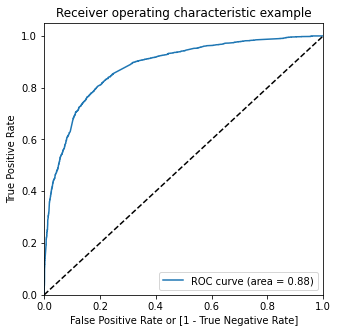

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

 #### The ROC graph looks good and the graph is not close to 45 degree line and shows closeness to true positive rate

### Lets now move ahead to find the optimal value of threshold

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Prospect ID,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.260359,0,1,1,1,0,0,0,0,0,0,0
1,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.233331,0,1,1,1,0,0,0,0,0,0,0
2,db308a34-ade6-4f0d-9779-586c5be188c7,0,0.302930,0,1,1,1,1,0,0,0,0,0,0
3,1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.814680,1,1,1,1,1,1,1,1,1,1,0
4,6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.134130,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.577304  0.972830  0.333583
0.2   0.2  0.740260  0.909976  0.635682
0.3   0.3  0.798547  0.834144  0.776612
0.4   0.4  0.814162  0.757908  0.848826
0.5   0.5  0.816481  0.699513  0.888556
0.6   0.6  0.796537  0.593268  0.921789
0.7   0.7  0.781076  0.515004  0.945027
0.8   0.8  0.760668  0.420114  0.970515
0.9   0.9  0.707174  0.249797  0.989005


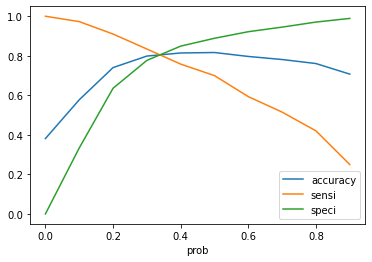

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above graph and the numbers of specificity and sensitivity we see at 0.35 are they mosyt balanced, so we should use that as our measure and recalculate our metrics and then go to the test data set for goodness of the model

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Prospect ID,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.260359,0,1,1,1,0,0,0,0,0,0,0,0
1,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.233331,0,1,1,1,0,0,0,0,0,0,0,0
2,db308a34-ade6-4f0d-9779-586c5be188c7,0,0.302930,0,1,1,1,1,0,0,0,0,0,0,0
3,1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.814680,1,1,1,1,1,1,1,1,1,1,0,1
4,6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.134130,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8090599876314162

#### We see that the total accuracy is more or less the same so we should be good here

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3281,  721],
       [ 514, 1952]], dtype=int64)

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7915652879156528

#### Sensitivity of 80% is really nice and it seems that the new threshold is working better than the old one

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.81984007996002

In [ ]:
# Calculate false postive rate - predicting how many leads converted
#when customer does not have converted
print(FP/ float(TN+FP))

0.18015992003998002


In [ ]:
# Positive predictive value
print (TP / float(TP+FP))

0.730265619154508


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.864558629776021


In [ ]:
y_train_pred_final.shape

(6468, 15)

### Precision and Recall

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

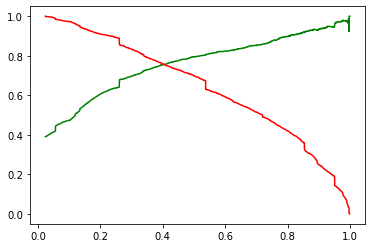

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
Recall = TP / float(TP+FN)
Recall

0.7915652879156528

### Recall is 0.8 which is exactly what the CEO would have wanted as he wanted to convert 80% of  his leads

In [ ]:
Precision = TP / float(TP+FP)
Precision

0.730265619154508

#### While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.


#### Ideally we would want a high recall value which is 0.8 in our case and is quite good

### F1 Score

In [ ]:
F1_score = (2* Recall * Precision)/ (Recall+Precision)
F1_score

0.7596808717649349

 #### We have an optimal value of F1 score and general rule is to icrease this value toward 1

### Using the model on the test set now to check the goodness of the model

In [ ]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,
dd53b3eb-ae22-474c-b872-48b05bbe180b,0,8.0,1011,8.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7a960b03-466c-4e36-bf12-b755fc77a0b1,0,0.0,0,0.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,0,5.0,59,5.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
f7ed6c72-7d36-413c-b2e0-414213c4ceef,0,0.0,0,0.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,
dd53b3eb-ae22-474c-b872-48b05bbe180b,0,0.857967,0.964504,2.613424,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7a960b03-466c-4e36-bf12-b755fc77a0b1,0,-0.656434,-0.885371,-1.085519,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,0,0.290067,-0.777416,1.226321,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
f7ed6c72-7d36-413c-b2e0-414213c4ceef,0,-0.656434,-0.885371,-1.085519,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified
Prospect ID,,,,,,,,,,,
dd53b3eb-ae22-474c-b872-48b05bbe180b,0,0.964504,0,0,0,0,1,0,0,1,0
7a960b03-466c-4e36-bf12-b755fc77a0b1,0,-0.885371,1,0,0,0,1,0,0,1,0
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,0,-0.777416,0,0,0,0,0,0,0,0,0
6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0,-0.885371,0,1,0,1,0,0,0,1,1
f7ed6c72-7d36-413c-b2e0-414213c4ceef,0,-0.885371,1,0,0,0,0,0,0,1,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred.head()

Prospect ID
dd53b3eb-ae22-474c-b872-48b05bbe180b    0.739882
7a960b03-466c-4e36-bf12-b755fc77a0b1    0.950590
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c    0.679784
6eb89ae5-d1e0-4c19-8661-8f9545e0e408    0.056027
f7ed6c72-7d36-413c-b2e0-414213c4ceef    0.853667
dtype: float64

In [ ]:
y_test_pred =y_test_pred.reset_index()
y_test_pred.head()

,Prospect ID,0
0,dd53b3eb-ae22-474c-b872-48b05bbe180b,0.739882
1,7a960b03-466c-4e36-bf12-b755fc77a0b1,0.950590
2,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,0.679784
3,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0.056027
4,f7ed6c72-7d36-413c-b2e0-414213c4ceef,0.853667


In [ ]:
y_test = y_test.reset_index()
y_test.head()

,Prospect ID,Converted
0,dd53b3eb-ae22-474c-b872-48b05bbe180b,1
1,7a960b03-466c-4e36-bf12-b755fc77a0b1,1
2,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,1
3,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0
4,f7ed6c72-7d36-413c-b2e0-414213c4ceef,1


In [ ]:
y_test_pred= y_test_pred.rename(columns={ 0 : 'Converted_Prob'})
y_test_pred.head()

,Prospect ID,Converted_Prob
0,dd53b3eb-ae22-474c-b872-48b05bbe180b,0.739882
1,7a960b03-466c-4e36-bf12-b755fc77a0b1,0.950590
2,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,0.679784
3,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0.056027
4,f7ed6c72-7d36-413c-b2e0-414213c4ceef,0.853667


In [ ]:
y_test_pred_final = pd.merge(y_test, y_test_pred, how='inner', on='Prospect ID')
y_test_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,dd53b3eb-ae22-474c-b872-48b05bbe180b,1,0.739882
1,7a960b03-466c-4e36-bf12-b755fc77a0b1,1,0.950590
2,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,1,0.679784
3,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0,0.056027
4,f7ed6c72-7d36-413c-b2e0-414213c4ceef,1,0.853667


In [ ]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,dd53b3eb-ae22-474c-b872-48b05bbe180b,1,0.739882,1
1,7a960b03-466c-4e36-bf12-b755fc77a0b1,1,0.950590,1
2,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,1,0.679784,1
3,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0,0.056027,0
4,f7ed6c72-7d36-413c-b2e0-414213c4ceef,1,0.853667,1


#### We now have a actual and predicted values on the test data set, we can use this to find accuracy and other metrics and compare those with the train data set

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8185425685425686

#### Accuracy is almost the same as that of the train dataset, so this a great sign

In [ ]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion2

array([[1393,  284],
       [ 219,  876]], dtype=int64)

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8306499701848539

#### We have very similar specificity and sensitivity for both our train and test data sets and hence, we can say our model is really good in terms of classification

### Assigning scores to the prospects

In [ ]:
y_train_pred_final.head()

,Prospect ID,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,0,0.260359,0,1,1,1,0,0,0,0,0,0,0,0
1,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,0,0.233331,0,1,1,1,0,0,0,0,0,0,0,0
2,db308a34-ade6-4f0d-9779-586c5be188c7,0,0.302930,0,1,1,1,1,0,0,0,0,0,0,0
3,1199b37d-f610-4bb8-bf18-15267dec61fa,0,0.814680,1,1,1,1,1,1,1,1,1,1,0,1
4,6b2d3b2f-9990-449c-9333-012b578e39c8,0,0.134130,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
Train_score = y_train_pred_final[['Prospect ID', 'Converted_Prob']]

In [ ]:
Train_score['Converted_Prob'] = Train_score['Converted_Prob'] * 100

In [ ]:
Train_score = Train_score.rename(columns = {'Converted_Prob': 'Score'}, inplace = False)

In [ ]:
Train_score.head()

,Prospect ID,Score
0,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,26.035899
1,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,23.333090
2,db308a34-ade6-4f0d-9779-586c5be188c7,30.293013
3,1199b37d-f610-4bb8-bf18-15267dec61fa,81.467988
4,6b2d3b2f-9990-449c-9333-012b578e39c8,13.413012


In [ ]:
y_test_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,dd53b3eb-ae22-474c-b872-48b05bbe180b,1,0.739882,1
1,7a960b03-466c-4e36-bf12-b755fc77a0b1,1,0.950590,1
2,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,1,0.679784,1
3,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0,0.056027,0
4,f7ed6c72-7d36-413c-b2e0-414213c4ceef,1,0.853667,1


In [ ]:
Test_score = y_test_pred_final[['Prospect ID', 'Converted_Prob']]
Test_score['Converted_Prob'] = Test_score['Converted_Prob'] * 100
Test_score = Test_score.rename(columns = {'Converted_Prob': 'Score'}, inplace = False)

In [ ]:
Test_score.head()

,Prospect ID,Score
0,dd53b3eb-ae22-474c-b872-48b05bbe180b,73.988190
1,7a960b03-466c-4e36-bf12-b755fc77a0b1,95.059011
2,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,67.978383
3,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,5.602734
4,f7ed6c72-7d36-413c-b2e0-414213c4ceef,85.366657


### Finding highest impacting features

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.0
Date:                Mon, 11 Jan 2021   Deviance:                       5432.1
Time:                        23:32:29   Pearson chi2:                 7.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.5974      0.183      8.725      0.000       1.239       1.956
Do Not Email                                  -1.2813      0.163     -7.849      0.000      -1.601      -0.961
Total Time Spent on Website                    1.0864      0.039     27.784      0.000       1.010       1.163
Lead Origin_Lead Add Form                      3.9214      0.181     21.617      0.000       3.566       4.277
Lead Source_Olark Chat                         1.1136      0.101     10.973      0.000       0.915       1.313
Last Activity_Converted to Lead               -0.6198      0.227     -2.730      0.006      -1.065      -0.175
Last Activity_Olark Chat Conversation         -0.9593      0.170     -5.630      0.000      -1.293      -0.625
Last Activity_SMS Sent                         1.1933      0.073     16.254      0.000       1.049       1.337
What is your current occupation_Other         -2.5564      0.811     -3.152      0.002      -4.146      -0.967
What is your current occupation_Student       -2.4492      0.295     -8.298      0.000      -3.028      -1.871
What is your current occupation_Unemployed    -2.7932      0.183    -15.259      0.000      -3.152      -2.434
Last Notable Activity_Modified                -0.8208      0.083     -9.880      0.000      -0.984      -0.658
==============================================================================================================
"""

#### Based on the the above result we see Lead Origin : Lead Add Form(In a positive fashion), Occupation: Unemployed (In a negative fashion) and Occupation: Unknown / Student (Negetively) impact the model the most and we used focus on the leads which have positive coefficients and leave those who have negative cofficients

### Final recommendations

#### Sales team should primarily focus on people who are:
•	Spending a lot of time on the website
•	Leads are adding form
•	Leeds from Olark Chat
•	Leads where the last activity was sending SMS

#### Apart from these they should focus less on the leads with the following characteristics:

•	Leads who do not email
•	Leads who already have been converted before
•	Leads who leave after Olark Conversation, do not proceed forward
•	Leads who are Students, Unemployed or their occupation is unknown
•	Leads who are not very active in terms of Activity of platforms
